In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ppscore as pps
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('/Users/matthewmccoy6/Desktop/PythonStats/Bamboo/titanic/train.csv')
df_test  = pd.read_csv('/Users/matthewmccoy6/Desktop/PythonStats/Bamboo/titanic/test.csv')
df_sample= pd.read_csv('/Users/matthewmccoy6/Desktop/PythonStats/Bamboo/titanic/gender_submission.csv')

<AxesSubplot:>

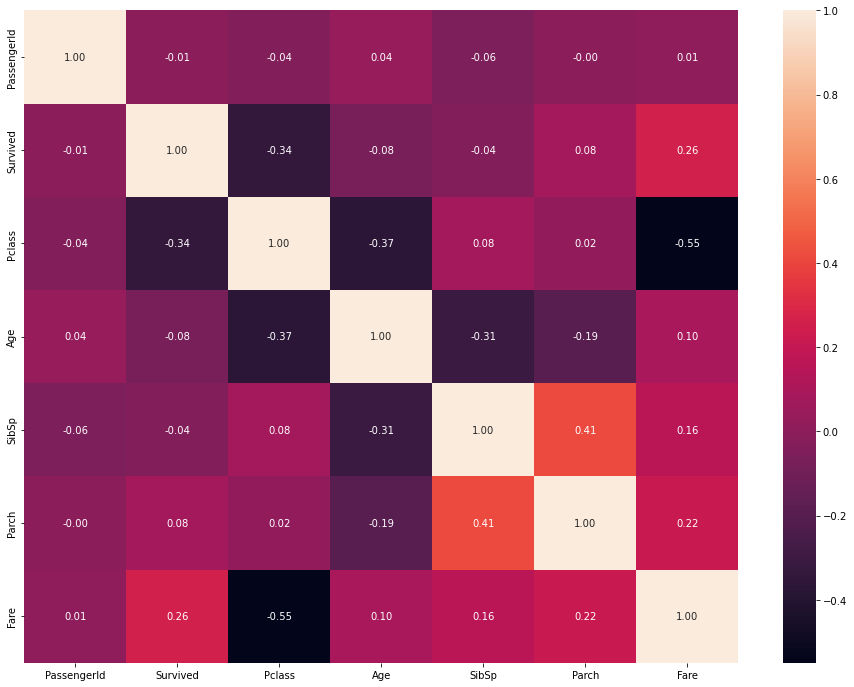

In [20]:
#correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df_train.corr(),annot=True,fmt=".2f")
#sns.heatmap(df_train.corr(), vmin=0, vmax=1, cmap="plasma", linewidths=0.75, annot=True)

In [9]:
#create the pps matrix
pps.matrix(df_train)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,PassengerId,PassengerId,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,PassengerId,Survived,0.000000,regression,True,mean absolute error,0.383838,0.456813,DecisionTreeRegressor()
2,PassengerId,Pclass,0.000000,regression,True,mean absolute error,0.691358,0.928120,DecisionTreeRegressor()
3,PassengerId,Name,0.000000,target_is_id,True,None,0.000000,0.000000,None
4,PassengerId,Sex,0.000000,classification,True,weighted F1,0.557800,0.541261,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
139,Embarked,Parch,0.000000,regression,True,mean absolute error,0.382452,0.578130,DecisionTreeRegressor()
140,Embarked,Ticket,0.000000,classification,True,weighted F1,0.001125,0.001095,DecisionTreeClassifier()
141,Embarked,Fare,0.000000,regression,True,mean absolute error,23.415106,26.258610,DecisionTreeRegressor()
142,Embarked,Cabin,0.010433,classification,True,weighted F1,0.000769,0.011194,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='y'>

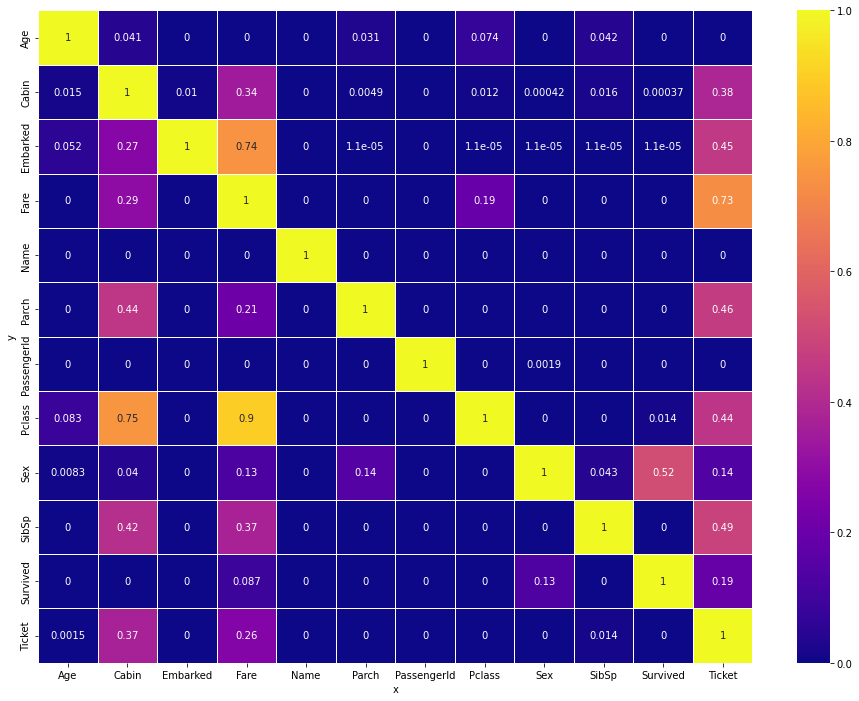

In [15]:
matrix_df = pps.matrix(df_train)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="plasma", linewidths=0.75, annot=True)